In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors
from matplotlib import pyplot as plt
import seaborn as sns

We write the function `prepare_country_stats` to extract our desired data from the CSV file. <br>
This desired data should contain just the *GDP per capita* and *Life satisfaction* data values.

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=='TOT']
    
    # Extract a simplified DataFrame which has country names in its index, different indicators as its columns,
    # and contains life satisfaction values as its data.
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
    
    # Rename the '2015' column as 'GDP per capita'
    gdp_per_capita.rename(columns={'2015':'GDP per capita'}, inplace=True)
    
    # Set country names as index
    gdp_per_capita.set_index('Country', inplace=True)
    
    # Merge the two DataFrames to obtain a single DataFrame with country names as index and left columns as
    # indicators and right columns as those from gdp_per_capita
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    
    # Sort the DataFrame records in ascending value of GDP per capita
    full_country_stats.sort_values(by='GDP per capita', inplace=True)
    
    # Mark indices given in the list here for removal, and obtain indices to be kept by set subtraction.
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

The `pd.read_csv` function is used to read a CSV file into a DataFrame variable. <br>
Several optional arguments can be provided, as can be seen below.

In [3]:
oecd_bli = pd.read_csv('datasets/life-sat/oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('datasets/life-sat/gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

We now process our data using the `prepare_country_stats` function to extract only the two required columns. <br>
Then, we load **column** arrays for both the columns into variables `X` and `y`.

In [4]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

Make a regression plot of y vs X to observe the trend visually.

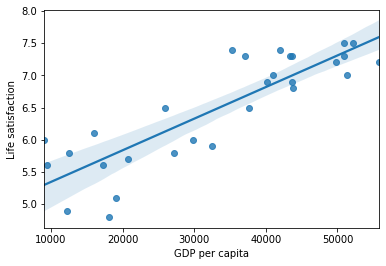

In [5]:
sns.regplot(country_stats['GDP per capita'], country_stats['Life satisfaction'])

# __OR__
# country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
# plt.show()

Now, we train two models on our data.<br>
`model1` is trained using linear regression.<br>
`model2` is trained using the K nearest neighbors regression.

In [6]:
model1 = sklearn.linear_model.LinearRegression()
model2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [7]:
model1.fit(X, y)
model2.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

We now use our ML model to predict the life satisfaction of people living in Cyprus.<br>
The GDP per capita value for Cyprus is 22587, and we do it as shown below.

In [8]:
X_new = [[22587]]
print(model1.predict(X_new))
print(model2.predict(X_new))

[[5.96242338]]
[[5.76666667]]


Thus, we predict Cyprus's life satisfaction to be close to 5.96 according to the linear regression model, and 5.77 according to the K nearest neighbors regression model (K being 3 in this case)